In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# ---- 1) Reproducibility & device ----

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# ---- 2) Data: simple y = 2x + 1 ----
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])   # shape (4, 1)
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])   # shape (4, 1)

dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=2, shuffle=True)  # small batches

In [7]:
# ---- 3) Model defination (using class & nn.Module) ----

class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()
    # single neuron : output = w*x + b
    self.linear = nn.Linear(1, 1) # Corrected: pass input and output feature sizes

  def forward(self, x):
    # x shape : (batch, features)
    return self.linear(x)

model = SimpleNet().to(device)
print("Initial parameters:", list(model.parameters()))

Initial parameters: [Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [8]:
# ---- 4) Loss and optimizer ----
criterion = nn.MSELoss()               # mean squared error for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)  # simple SGD

In [10]:
# ---- 5) Training loop ----
epochs = 200
loss_history = []

for epoch in range(epochs):
    epoch_losses = []
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)

        # forward
        y_pred = model(xb)

        # compute loss
        loss = criterion(y_pred, yb)

        # backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    loss_history.append(sum(epoch_losses) / len(epoch_losses))
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:03d}/{epochs}  Loss: {loss_history[-1]:.6f}")


Epoch 020/200  Loss: 0.006569
Epoch 040/200  Loss: 0.005139
Epoch 060/200  Loss: 0.004043
Epoch 080/200  Loss: 0.003172
Epoch 100/200  Loss: 0.002480
Epoch 120/200  Loss: 0.001951
Epoch 140/200  Loss: 0.001619
Epoch 160/200  Loss: 0.001198
Epoch 180/200  Loss: 0.000934
Epoch 200/200  Loss: 0.000781


In [11]:

# ---- 6) After training: check learned params ----
w = model.linear.weight.item()   # weight
b = model.linear.bias.item()     # bias
print(f"Learned weight: {w:.4f}, Learned bias: {b:.4f}")

Learned weight: 1.9781, Learned bias: 1.0656


In [12]:
# ---- 7) Inference on new data ----
model.eval()
with torch.no_grad():
    test_x = torch.tensor([[5.0]]).to(device)
    pred = model(test_x).item()
print(f"Prediction for x=5 -> {pred:.4f}   (expected 11)")

Prediction for x=5 -> 10.9560   (expected 11)


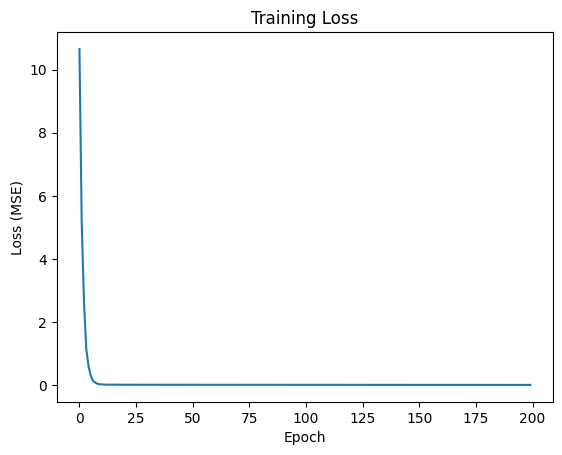

In [13]:
# ---- 8) Plot loss (optional) ----
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss")
plt.show()

In [14]:
# ---- 9) Save model ----
torch.save(model.state_dict(), "simple_net.pth")
print("Model saved to simple_net.pth")

Model saved to simple_net.pth
